# Text Analytics with Python

## Basic Feature Extraction
### Load the packages and Dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import textblob
from textblob import TextBlob
import seaborn as sns

In [7]:
train = pd.read_csv('train_E6oV3lV.csv')

In [8]:
# lets take a look at the first few records in our dataset
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
# Total number of records in our data
train.count()

id       31962
label    31962
tweet    31962
dtype: int64

### Finding the number of words in a sentence

In [5]:
# Find the number of words by splitting the sentence by spaces
train['word_count'] = train['tweet'].apply(lambda x: len(TextBlob(x).words))
train.head()

,id,label,tweet,word_count
0,1,0,@user when a father is dysfunctional and is s...,18
1,2,0,@user @user thanks for #lyft credit i can't us...,21
2,3,0,bihday your majesty,3
3,4,0,#model i love u take with u all the time in ...,14
4,5,0,factsguide: society now #motivation,4


Text(0.5, 1.0, 'Number of Words distributed across our Corpus')

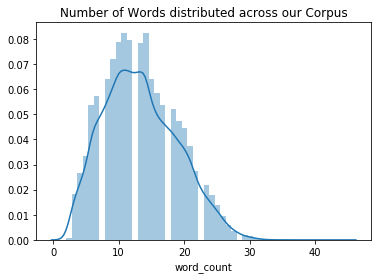

In [7]:
sns.distplot(train["word_count"]).set_title('Number of Words distributed across our Corpus')

### Finding the number of characters in a sentence

In [8]:
train['char_count'] = train['tweet'].str.len() ## this also includes spaces
train.head()

,id,label,tweet,word_count,char_count
0,1,0,@user when a father is dysfunctional and is s...,18,102
1,2,0,@user @user thanks for #lyft credit i can't us...,21,122
2,3,0,bihday your majesty,3,21
3,4,0,#model i love u take with u all the time in ...,14,86
4,5,0,factsguide: society now #motivation,4,39


### Number of Stopwords

Stopwords are the most common words which build up a sentence. For example: a,the, of, in, etc.

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/JVKR/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
stop = stopwords.words('english')

In [11]:
train['stopwords'] = train['tweet'] \
    .apply(lambda x: len([x for x in x.split() if x in stop]))
train.head()

,id,label,tweet,word_count,char_count,stopwords
0,1,0,@user when a father is dysfunctional and is s...,18,102,10
1,2,0,@user @user thanks for #lyft credit i can't us...,21,122,5
2,3,0,bihday your majesty,3,21,1
3,4,0,#model i love u take with u all the time in ...,14,86,5
4,5,0,factsguide: society now #motivation,4,39,1


In [49]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Number of Special Characters

In [12]:
train['hastags'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train.head()

,id,label,tweet,word_count,char_count,stopwords,hastags
0,1,0,@user when a father is dysfunctional and is s...,18,102,10,1
1,2,0,@user @user thanks for #lyft credit i can't us...,21,122,5,3
2,3,0,bihday your majesty,3,21,1,0
3,4,0,#model i love u take with u all the time in ...,14,86,5,1
4,5,0,factsguide: society now #motivation,4,39,1,1


### Number of Numerics

In [14]:
train['numerics'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train.head()

,id,label,tweet,word_count,char_count,stopwords,hastags,numerics
0,1,0,@user when a father is dysfunctional and is s...,18,102,10,1,0
1,2,0,@user @user thanks for #lyft credit i can't us...,21,122,5,3,0
2,3,0,bihday your majesty,3,21,1,0,0
3,4,0,#model i love u take with u all the time in ...,14,86,5,1,0
4,5,0,factsguide: society now #motivation,4,39,1,1,0


### Number of Uppercase words

In [15]:
train['upper'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train.head()

,id,label,tweet,word_count,char_count,stopwords,hastags,numerics,upper
0,1,0,@user when a father is dysfunctional and is s...,18,102,10,1,0,0
1,2,0,@user @user thanks for #lyft credit i can't us...,21,122,5,3,0,0
2,3,0,bihday your majesty,3,21,1,0,0,0
3,4,0,#model i love u take with u all the time in ...,14,86,5,1,0,0
4,5,0,factsguide: society now #motivation,4,39,1,1,0,0


## Basic Pre-processing

### Removing Punctuation

In [17]:
train['tweet'] = train['tweet'].str.replace('[^\w\s]','')
train.head()

,id,label,tweet,word_count,char_count,stopwords,hastags,numerics,upper
0,1,0,user when a father is dysfunctional and is so...,18,102,10,1,0,0
1,2,0,user user thanks for lyft credit i cant use ca...,21,122,5,3,0,0
2,3,0,bihday your majesty,3,21,1,0,0,0
3,4,0,model i love u take with u all the time in u...,14,86,5,1,0,0
4,5,0,factsguide society now motivation,4,39,1,1,0,0


### Removal of Stop Words

In [18]:
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
2                                       bihday majesty
3                model love u take u time urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

In [19]:
train.count()

id            31962
label         31962
tweet         31962
word_count    31962
char_count    31962
stopwords     31962
hastags       31962
numerics      31962
upper         31962
dtype: int64

### Common words removal

In [24]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[:20]
freq

life        1086
like        1042
today        991
new          983
positive     928
thankful     919
get          917
people       852
good         840
bihday       825
cant         802
ððð          796
one          781
ðð           763
see          756
dont         718
fathers      706
smile        677
go           648
want         644
dtype: int64

In [25]:
freq = list(freq.index)
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train.head()

,id,label,tweet,word_count,char_count,stopwords,hastags,numerics,upper
0,1,0,father dysfunctional selfish drags kids dysfun...,18,102,10,1,0,0
1,2,0,thanks lyft credit use cause offer wheelchair ...,21,122,5,3,0,0
2,3,0,majesty,3,21,1,0,0,0
3,4,0,model take urð ðððð,14,86,5,1,0,0
4,5,0,factsguide society motivation,4,39,1,1,0,0


### Very rare words removal

In [26]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[-10:]
freq

perfecting     1
ihateschool    1
longporn       1
vitmind        1
åçèªå          1
eople          1
gsãã           1
prenup         1
ðððððððð¾      1
somescam       1
dtype: int64

In [27]:
freq = list(freq.index)
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train.head()

,id,label,tweet,word_count,char_count,stopwords,hastags,numerics,upper
0,1,0,father dysfunctional selfish drags kids dysfun...,18,102,10,1,0,0
1,2,0,thanks lyft credit use cause offer wheelchair ...,21,122,5,3,0,0
2,3,0,majesty,3,21,1,0,0,0
3,4,0,model take urð ðððð,14,86,5,1,0,0
4,5,0,factsguide society motivation,4,39,1,1,0,0


### Spelling correction (Optional)

In [28]:
train['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    father dysfunctional selfish drags kiss dysfun...
1    thanks left credit use cause offer wheelchair ...
2                                              majesty
3                                   model take or ðððð
4                        factsguide society motivation
Name: tweet, dtype: object

We should also keep in mind that words are often used in their abbreviated form. For instance, ‘your’ is used as ‘ur’. We should treat this before the spelling correction step, otherwise these words might be transformed into any other word like the one shown above

### Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences.

In [33]:
nltk.download('punkt')
TextBlob(train['tweet'][0]).words

[nltk_data] Downloading package punkt to /Users/JVKR/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run'])

### Stemming
Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.

In [36]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
train['tweet'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0        father dysfunct selfish drag kid dysfunct run
1    thank lyft credit use caus offer wheelchair va...
2                                              majesti
3                                  model take urð ðððð
4                              factsguid societi motiv
5    22 huge fan fare big talk leav chao pay disput...
6                                 camp tomorrow dannyâ
7    next school year year examsð think school exam...
8    land allin cav champion cleveland clevelandcavali
9                                           welcom gr8
Name: tweet, dtype: object

### Lemmatization
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices

In [37]:
nltk.download('wordnet')
from textblob import Word
train['tweet'] = train['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train.head()

[nltk_data] Downloading package wordnet to /Users/JVKR/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,label,tweet,word_count,char_count,stopwords,hastags,numerics,upper
0,1,0,father dysfunctional selfish drag kid dysfunct...,18,102,10,1,0,0
1,2,0,thanks lyft credit use cause offer wheelchair ...,21,122,5,3,0,0
2,3,0,majesty,3,21,1,0,0,0
3,4,0,model take urð ðððð,14,86,5,1,0,0
4,5,0,factsguide society motivation,4,39,1,1,0,0


## Feature Selection 
### N-grams

N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used

In [38]:
TextBlob(train['tweet'][0])

TextBlob("father dysfunctional selfish drag kid dysfunction run")

In [40]:
TextBlob(train['tweet'][0]).ngrams(2)

[WordList(['father', 'dysfunctional']),
 WordList(['dysfunctional', 'selfish']),
 WordList(['selfish', 'drag']),
 WordList(['drag', 'kid']),
 WordList(['kid', 'dysfunction']),
 WordList(['dysfunction', 'run'])]

### Term Frequency
###### TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [43]:
tf1 = (train['tweet'][0:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,drag,1.0
1,father,1.0
2,run,1.0
3,selfish,1.0
4,kid,1.0
5,dysfunction,1.0
6,dysfunctional,1.0
7,credit,1.0
8,offer,1.0
9,getthanked,1.0


### Inverse Document Frequency
IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

In [44]:
import numpy as np

for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['tweet'].str.contains(word)])))
tf1

,words,tf,idf
0,drag,1.0,6.346951
1,father,1.0,3.987109
2,run,1.0,4.642203
3,selfish,1.0,7.664253
4,kid,1.0,4.567168
5,dysfunction,1.0,9.679156
6,dysfunctional,1.0,10.372303
7,credit,1.0,7.327781
8,offer,1.0,6.522155
9,getthanked,1.0,9.679156


### Term Frequency – Inverse Document Frequency (TF-IDF)
TF-IDF is the multiplication of the TF and IDF which we calculated above

In [45]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,drag,1.0,6.346951,6.346951
1,father,1.0,3.987109,3.987109
2,run,1.0,4.642203,4.642203
3,selfish,1.0,7.664253,7.664253
4,kid,1.0,4.567168,4.567168
5,dysfunction,1.0,9.679156,9.679156
6,dysfunctional,1.0,10.372303,10.372303
7,credit,1.0,7.327781,7.327781
8,offer,1.0,6.522155,6.522155
9,getthanked,1.0,9.679156,9.679156


### Sentiment Analysis

We will use the sentiment function from the TextBlob library for carrying out sentiment analysis on the preprocessed tweets

The sentiment function of textblob returns two properties, polarity, and subjectivity.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [47]:
train['tweet'][:10].apply(lambda x: TextBlob(x).sentiment)

0    (-0.3, 0.5354166666666667)
1                    (0.2, 0.2)
2                    (0.0, 0.0)
3                    (0.0, 0.0)
4                    (0.0, 0.0)
5    (0.20000000000000004, 0.5)
6                    (0.0, 0.0)
7                  (-0.4, 0.45)
8                    (0.0, 0.0)
9                    (0.8, 0.9)
Name: tweet, dtype: object

In [51]:
train['sentiment'] = train['tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
train[0:10]

,id,label,tweet,word_count,char_count,stopwords,hastags,numerics,upper,sentiment
0,1,0,father dysfunctional selfish drag kid dysfunct...,18,102,10,1,0,0,-0.3
1,2,0,thanks lyft credit use cause offer wheelchair ...,21,122,5,3,0,0,0.2
2,3,0,majesty,3,21,1,0,0,0,0.0
3,4,0,model take urð ðððð,14,86,5,1,0,0,0.0
4,5,0,factsguide society motivation,4,39,1,1,0,0,0.0
5,6,0,22 huge fan fare big talking leave chaos pay d...,19,116,6,1,0,0,0.2
6,7,0,camping tomorrow dannyâ,11,74,0,0,0,0,0.0
7,8,0,next school year year examsð think school exam...,22,143,6,7,0,0,-0.4
8,9,0,land allin cavs champion cleveland clevelandca...,11,87,2,5,0,0,0.0
9,10,0,welcome gr8,10,50,3,1,0,0,0.8


In [52]:
def valence(row):
    if row['sentiment'] == 0:
        val = 'Neutral'
    elif 0 < row['sentiment'] < 0.5:
        val = 'Positive'
    elif row['sentiment'] >= 0.5:
        val = 'Strong Positive'
    elif -0.5 <= row['sentiment'] < 0:
        val = 'Negative'
    else:
        val = 'Strong Negative'
    return val

In [53]:
train['valence'] = train[['tweet','sentiment']].apply(valence, axis=1)
train[0:10]

,id,label,tweet,word_count,char_count,stopwords,hastags,numerics,upper,sentiment,valence
0,1,0,father dysfunctional selfish drag kid dysfunct...,18,102,10,1,0,0,-0.3,Negative
1,2,0,thanks lyft credit use cause offer wheelchair ...,21,122,5,3,0,0,0.2,Positive
2,3,0,majesty,3,21,1,0,0,0,0.0,Neutral
3,4,0,model take urð ðððð,14,86,5,1,0,0,0.0,Neutral
4,5,0,factsguide society motivation,4,39,1,1,0,0,0.0,Neutral
5,6,0,22 huge fan fare big talking leave chaos pay d...,19,116,6,1,0,0,0.2,Positive
6,7,0,camping tomorrow dannyâ,11,74,0,0,0,0,0.0,Neutral
7,8,0,next school year year examsð think school exam...,22,143,6,7,0,0,-0.4,Negative
8,9,0,land allin cavs champion cleveland clevelandca...,11,87,2,5,0,0,0.0,Neutral
9,10,0,welcome gr8,10,50,3,1,0,0,0.8,Strong Positive


In [54]:
valence_counts = train.groupby('valence').count()

### Visualizing the distribution of sentiment across the text corpus

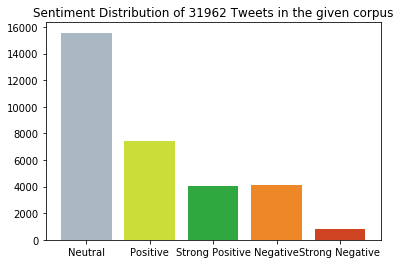

In [55]:
positive = valence_counts['id']['Positive']
negative = valence_counts['id']['Negative']
neutral = valence_counts['id']['Neutral']
strong_pos = valence_counts['id']['Strong Positive']
strong_neg = valence_counts['id']['Strong Negative']

total = positive + negative + neutral + strong_pos + strong_neg

colors = ['#aab8c4','#cadd39', '#2fa83f', '#ed8728', '#ce4321']
sentiments = ["Neutral", "Positive", "Strong Positive", "Negative", "Strong Negative" ]
sizes = [neutral, positive, strong_pos, negative, strong_neg]
labels = 'Positive ({})'.format(positive), 'Strong Positive ({})'.format(strong_pos), 'Strong Negative ({})'.format(strong_neg), 'Negative ({})'.format(negative), 'Neutral ({})'.format(neutral)

## use matplotlib to plot the chart
plt.bar(
    x=sentiments,
    height = sizes,
    color=colors
)

plt.title("Sentiment Distribution of {} Tweets in the given corpus".format(total))
plt.savefig('sentiment_pie.png')
plt.show()



In [56]:
import os
from os import path
from wordcloud import WordCloud

### Creating a Word Cloud

<Figure size 720x504 with 0 Axes>

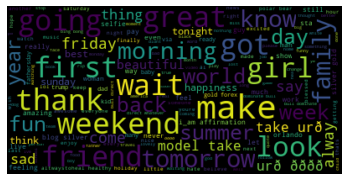

In [68]:
wordcloud = WordCloud(max_font_size=40).generate(' '.join(train['tweet']))
plt.figure(figsize=(10,7))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.savefig('word_cloud.png')

plt.show()

In [92]:
sba=["wine","cookies","values","chocolate","wine","wine","wine","data","AI","AI","data"]
sba

['wine',
 'cookies',
 'values',
 'chocolate',
 'wine',
 'wine',
 'wine',
 'data',
 'AI',
 'AI',
 'data']

<Figure size 432x288 with 0 Axes>

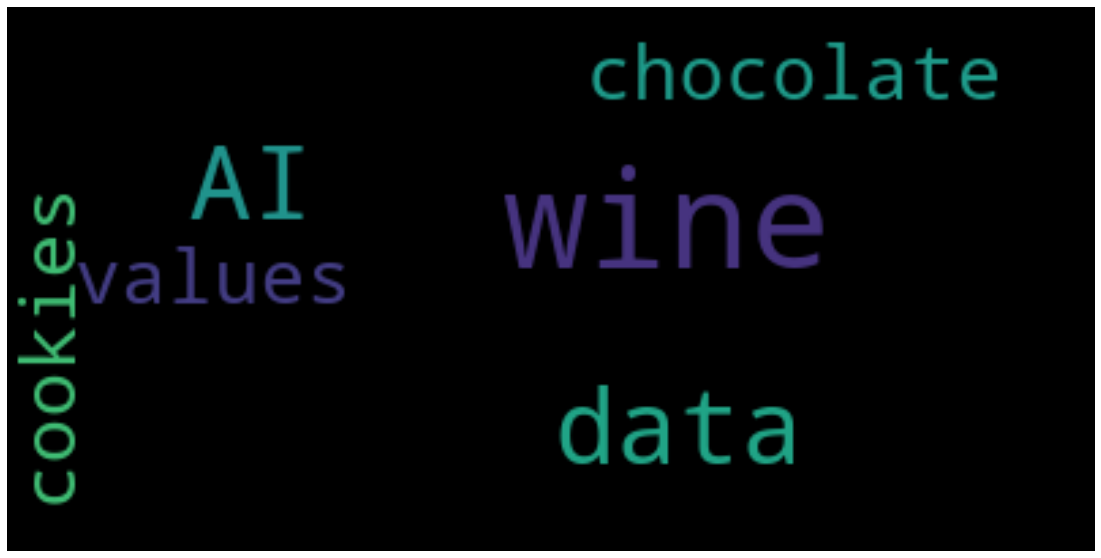

In [93]:
wordcloud = WordCloud(max_font_size=50).generate(' '.join(sba))
plt.figure()
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('sba_word_cloud.png')

plt.show()

### K-means Clustering 

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=st.stem, ngram_range=(1,3))


In [80]:
# Create the TF-IDF Vector for the whole text corpus
%time tfidf_matrix = tfidf_vectorizer.fit_transform(train['tweet']) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 2.77 s, sys: 72.2 ms, total: 2.84 s
Wall time: 2.88 s
(31962, 64)


In [81]:
terms = tfidf_vectorizer.get_feature_names()

In [82]:
# Initiate the Clustering of text through K-means clustering
from sklearn.cluster import KMeans

num_clusters = 5
km = KMeans(n_clusters=num_clusters)
%time km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

CPU times: user 4min 5s, sys: 436 ms, total: 4min 6s
Wall time: 3min 59s


In [83]:
films = { 'tweet': train['tweet'], 'cluster': clusters }
frame = pd.DataFrame(films , columns = ['tweet','cluster'])

In [84]:
frame['cluster'].value_counts()

3    9699
4    6942
0    6431
2    5022
1    3868
Name: cluster, dtype: int64

In [85]:
frame['sentiment'] = train['sentiment']

In [86]:
grouped = frame['sentiment'].groupby(frame['cluster']) #groupby cluster for aggregation purposes

a = grouped.mean()
a

cluster
0    0.074373
1    0.149490
2    0.122827
3    0.080741
4    0.062355
Name: sentiment, dtype: float64

Text(0.5, 1.0, 'Average Sentiment across Clusters')

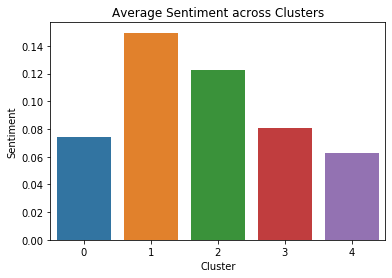

In [87]:
adf = pd.DataFrame(data={ 'Cluster': [0,1,2,3,4] , 'Sentiment': a})
sns.barplot(adf['Cluster'], adf['Sentiment']).set_title('Average Sentiment across Clusters')

In [90]:
frame['label'] = train['label']

In [91]:
grouped = frame['label'].groupby(frame['cluster']) #groupby cluster for aggregation purposes

a = grouped.mean()
a


cluster
0    0.052869
1    0.033868
2    0.059140
3    0.097845
4    0.075627
Name: label, dtype: float64